<a href="https://colab.research.google.com/github/Sugam1530/Productionization-of-ML-Systems/blob/main/Email_Spam_Prediction(Project_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install nltk

In [58]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/email.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5573, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.isnull().sum()

,0
Category,0
Message,0


In [10]:
df.duplicated().sum()

415

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5158, 2)

In [18]:
df['Category'].unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

In [20]:
df = df[(df['Category'] == 'spam') | (df['Category'] == 'ham')]

In [21]:
df.shape

(5157, 2)

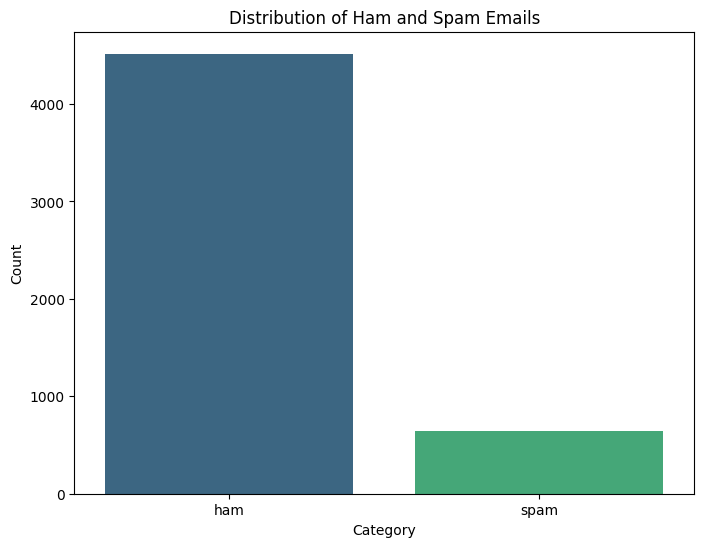

In [22]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

plt.title('Distribution of Ham and Spam Emails')
plt.xlabel('Category')
plt.ylabel('Count')

plt.show()

In [23]:
df['Message'] = df['Message'].str.lower()

In [24]:
df.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [27]:
df['Message'] = df['Message'].str.replace(f'[{string.punctuation}]', '', regex=True)

In [32]:
nltk.download('punkt')

df['Message'] = df['Message'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [33]:
df.head()

,Category,Message
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [38]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['Message'] = df['Message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [40]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_tokens(tokens):
    pos_tags = pos_tag(tokens)
    return [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]

df['Message'] = df['Message'].apply(lemmatize_tokens)

In [42]:
df.head()

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, dont, think, go, usf, life, around, though]"


In [44]:
df['Message'] = df['Message'].apply(lambda x: ' '.join(x))

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data into a BoW matrix
X_bow = vectorizer.fit_transform(df['Message'])

In [45]:
# Convert the sparse matrix to a dense format (if needed) and check its shape
print(X_bow.shape)

# Get feature names (words) from the vectorizer
features = vectorizer.get_feature_names_out()
print(features[:10])


(5157, 8491)
['008704050406' '0089my' '0121' '01223585236' '01223585334' '0125698789'
 '02' '020603' '0207' '02070836089']


In [49]:
X = X_bow
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training feature matrix shape: {X_train.shape}")
print(f"Testing feature matrix shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training feature matrix shape: (4125, 8491)
Testing feature matrix shape: (1032, 8491)
Training labels shape: (4125,)
Testing labels shape: (1032,)


In [51]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [52]:
# Predict the labels for the test data
y_pred = nb_model.predict(X_test)


In [53]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       896
        spam       0.83      0.96      0.89       136

    accuracy                           0.97      1032
   macro avg       0.91      0.97      0.94      1032
weighted avg       0.97      0.97      0.97      1032



In [55]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
y_pred_lr = lr_model.predict(X_test)

In [57]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print("Logistic Regression Classification Report:")
print(report_lr)

Logistic Regression Accuracy: 0.98
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       896
        spam       0.99      0.85      0.91       136

    accuracy                           0.98      1032
   macro avg       0.98      0.92      0.95      1032
weighted avg       0.98      0.98      0.98      1032



In [59]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred_rf = rf_model.predict(X_test)

In [62]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(report_rf)

Random Forest Accuracy: 0.97
Random Forest Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       896
        spam       0.98      0.79      0.87       136

    accuracy                           0.97      1032
   macro avg       0.98      0.89      0.93      1032
weighted avg       0.97      0.97      0.97      1032



In [63]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [64]:
y_pred_svm = svm_model.predict(X_test)

In [65]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("SVM Classification Report:")
print(report_svm)

SVM Accuracy: 0.98
SVM Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       896
        spam       0.95      0.90      0.93       136

    accuracy                           0.98      1032
   macro avg       0.97      0.95      0.96      1032
weighted avg       0.98      0.98      0.98      1032

